# 0. Setup Paths

In [3]:
import os


In [1]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
"""
This will set path for model

"""
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
"""
If the path doesn't exist it will add the path in os
"""
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
#Install protoc(protocol buffers)
#install official tensorflow object detection API

In [11]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos


zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
error: Setup script exited with error: command 'C:\\Program Files\\Microsoft Visual Studio\\2022\\Community\\VC\\Tools\\MSVC\\14.30.30705\\bin\\HostX86\\x64\\cl.exe' failed with exit status 2


copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\fpn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\graph_rewriter_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\grid_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\hyperparams_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\image_resizer_pb2.py -> build\lib\object_detection\protos
copy

Obtaining file:///E:/Tensorflow%20Object%20Detection/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.8: E:\Tensorflow Object Detection\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-01-09 16:47:56.265616: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-09 16:47:56.955032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1362 MB memory:  -> device: 0, name: GeForce 930MX, pci bus id: 0000:01:00.0, compute capability: 5.0
E:\Tensorflow Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Bui

I0109 16:48:19.448290 10732 efficientnet_model.py:147] round_filter input=16 output=32
I0109 16:48:19.448290 10732 efficientnet_model.py:147] round_filter input=24 output=40
I0109 16:48:19.964145 10732 efficientnet_model.py:147] round_filter input=24 output=40
I0109 16:48:19.964145 10732 efficientnet_model.py:147] round_filter input=40 output=72
I0109 16:48:20.473782 10732 efficientnet_model.py:147] round_filter input=40 output=72
I0109 16:48:20.473782 10732 efficientnet_model.py:147] round_filter input=80 output=144
I0109 16:48:21.157526 10732 efficientnet_model.py:147] round_filter input=80 output=144
I0109 16:48:21.157526 10732 efficientnet_model.py:147] round_filter input=112 output=200
I0109 16:48:21.852484 10732 efficientnet_model.py:147] round_filter input=112 output=200
I0109 16:48:21.852484 10732 efficientnet_model.py:147] round_filter input=192 output=344
I0109 16:48:22.801311 10732 efficientnet_model.py:147] round_filter input=192 output=344
I0109 16:48:22.802310 10732 effic

In [61]:
!pip install tensorflow --upgrade


2022-01-09 16:26:44.102291: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50136b300 of size 1280 next 992
2022-01-09 16:26:44.102311: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50136b800 of size 1792 next 101
2022-01-09 16:26:44.102332: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50136bf00 of size 256 next 100
2022-01-09 16:26:44.102355: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50136c000 of size 13824 next 408
2022-01-09 16:26:44.102375: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50136f600 of size 19456 next 248
2022-01-09 16:26:44.102396: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 501374200 of size 256 next 251
2022-01-09 16:26:44.102420: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 501374300 of size 1280 next 412
2022-01-09 16:26:44.102440: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 501374800 of size 1280 next 132

2022-01-09 16:26:44.110229: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5017fda00 of size 5376 next 216
2022-01-09 16:26:44.110249: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5017fef00 of size 1024 next 209
2022-01-09 16:26:44.110272: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5017ff300 of size 1024 next 11
2022-01-09 16:26:44.110296: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5017ff700 of size 1024 next 12
2022-01-09 16:26:44.110315: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5017ffb00 of size 1024 next 14
2022-01-09 16:26:44.110335: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5017fff00 of size 5376 next 18
2022-01-09 16:26:44.110358: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 501801400 of size 5376 next 25
2022-01-09 16:26:44.110377: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 501802900 of size 5376 next 466
2022-

2022-01-09 16:26:44.124781: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 506d70900 of size 67072 next 605
2022-01-09 16:26:44.124791: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 506d80f00 of size 153600 next 612
2022-01-09 16:26:44.124802: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 506da6700 of size 250368 next 1726
2022-01-09 16:26:44.124812: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 506de3900 of size 256 next 1727
2022-01-09 16:26:44.124822: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 506de3a00 of size 3538944 next 1523
2022-01-09 16:26:44.124833: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 507143a00 of size 3538944 next 1527
2022-01-09 16:26:44.124843: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 5074a3a00 of size 3538944 next 1544
2022-01-09 16:26:44.124852: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 507803a00 of s

2022-01-09 16:26:44.127234: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf2b00 of size 3584 next 1383
2022-01-09 16:26:44.127246: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf3900 of size 256 next 1381
2022-01-09 16:26:44.127256: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf3a00 of size 3584 next 1388
2022-01-09 16:26:44.127265: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf4800 of size 768 next 1390
2022-01-09 16:26:44.127276: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf4b00 of size 768 next 1393
2022-01-09 16:26:44.127286: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf4e00 of size 768 next 1394
2022-01-09 16:26:44.127296: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf5100 of size 768 next 1392
2022-01-09 16:26:44.127307: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 50cbf5400 of size 3584 next 13

2022-01-09 16:26:44.131544: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510ba8900 of size 8448 next 2228
2022-01-09 16:26:44.131574: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510baaa00 of size 512 next 2230
2022-01-09 16:26:44.131627: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510baac00 of size 8448 next 2231
2022-01-09 16:26:44.131642: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510bacd00 of size 1536 next 2233
2022-01-09 16:26:44.131655: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510bad300 of size 1536 next 2234
2022-01-09 16:26:44.131669: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510bad900 of size 1536 next 2235
2022-01-09 16:26:44.131681: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510badf00 of size 1536 next 2236
2022-01-09 16:26:44.131693: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 510bae500 of size 8448 nex

In [11]:
import object_detection

In [13]:
#this is going to install object detection model from the tensorflow model zoo
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [14]:
"""
This will set labels on tensorflow\workspace\annotation
"""
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4 },{'name':'How', 'id':5}, {'name':'You', 'id':6}]

with open(files['LABELMAP'], 'w',encoding="utf-8") as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [15]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [16]:
#tfrecord converts annotation in images into a file format
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [17]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [18]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [19]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [20]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [21]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [22]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [23]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [24]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [25]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [26]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [27]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [83]:
!{command}

2022-01-09 16:29:26.031661: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-09 16:29:32.178290: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 486 MB memory:  -> device: 0, name: GeForce 930MX, pci bus id: 0000:01:00.0, compute capability: 5.0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0109 16:29:32.234620  8456 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I0109 16:29:32.258557  8456 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwri

>>>   File "E:\Anaconda\lib\threading.py", line 932, in _bootstrap_inner
>>>     self.run()
>>> 
>>>   File "E:\Tensorflow Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\model_lib_v2.py", line 170, in _dummy_computation_fn
>>>     return _compute_losses_and_predictions_dicts(model, features, labels,
>>> 
>>>   File "E:\Tensorflow Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\model_lib_v2.py", line 123, in _compute_losses_and_predictions_dicts
>>>     prediction_dict = model.predict(
>>> 
>>>   File "E:\Tensorflow Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 569, in predict
>>>     if self._feature_extractor.is_keras_model:
>>> 
>>>   File "E:\Tensorflow Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\meta_architectures\ssd_meta_arch.py",

# 7. Evaluate the Model

In [28]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [29]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


# 8. Load Train Model From Checkpoint

In [30]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [31]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detection With Image

In [32]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [42]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'you.1912a1b8-6e23-11ec-82c5-28c63fc783db.jpg')

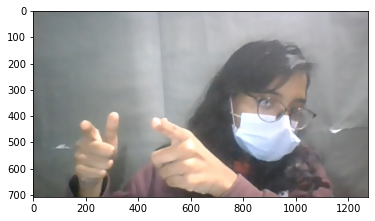

In [43]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 9. Real Time Detections from Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
!pip install opencv-python

In [44]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break